<a href="https://colab.research.google.com/github/YousefAbuShaar/AI-Instagram-Fake-Accounts-Detector/blob/main/Instagram_fake_accounts_AI_detector_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix



In [169]:
print("'train.csv'...")
train_data = pd.read_csv("train.csv")

print("'test.csv'...")
test_data = pd.read_csv("test.csv")



Unveiling the secrets within 'train.csv'...
Now, let's peek into 'test.csv'...


In [170]:
train_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [171]:

print(f"Number of rows: {train_data.shape[0]}")
print(f"Number of columns: {train_data.shape[1]}")



Number of rows: 576
Number of columns: 12


In [172]:
print("Data Types: ")
print(train_data.dtypes)


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


In [173]:
print("Null Values: ")
print(train_data.isnull().sum())


Null Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [174]:
print("Data Description: ")
train_data.describe()

Data Description: 


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [175]:

for column in train_data.columns:
  print(f"Unique values for '{column}': {train_data[column].unique()}")


Unique values for 'profile pic': [1 0]
Unique values for 'nums/length username': [0.27 0.   0.1  0.29 0.13 0.18 0.33 0.12 0.19 0.2  0.06 0.44 0.24 0.14
 0.36 0.22 0.08 0.15 0.09 0.45 0.38 0.11 0.17 0.31 0.3  0.07 0.43 0.5
 0.25 0.57 0.88 0.55 0.8  0.4  0.41 0.67 0.89 0.16 0.58 0.64 0.42 0.21
 0.71 0.83 0.47 0.91 0.28 0.54 0.46 0.73 0.6  0.86 0.62 0.92]
Unique values for 'fullname words': [ 0  2  1  4  3  6 12  5 10]
Unique values for 'nums/length fullname': [0.   0.12 0.1  0.08 0.24 0.25 0.33 0.14 0.22 0.43 0.4  0.36 0.29 0.11
 0.31 0.89 0.2  0.38 0.27 0.44 1.   0.5  0.18 0.57 0.46]
Unique values for 'name==username': [0 1]
Unique values for 'description length': [ 53  44   0  82  81  50  71  40  54 103  98  46  48  63 106  35  30  27
 109 132 126 122 138  56   9 134   2  23  93   4   1  91  57 108  12   3
  39  68 129  64  42  70  74   8  28  18  36  11  29  24  21  34  59  15
  16  73  26  55 140 113  38  89 123  33   5 150 149 148  19 133  43  37
  87  95 117  58  62 137  14 131  10

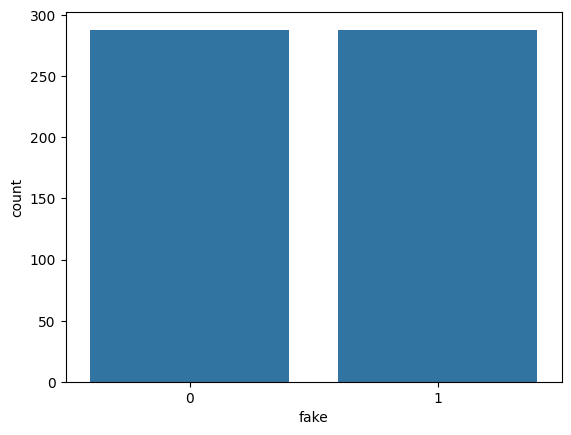

In [176]:
sns.countplot(x = "fake", data = train_data)
plt.show()


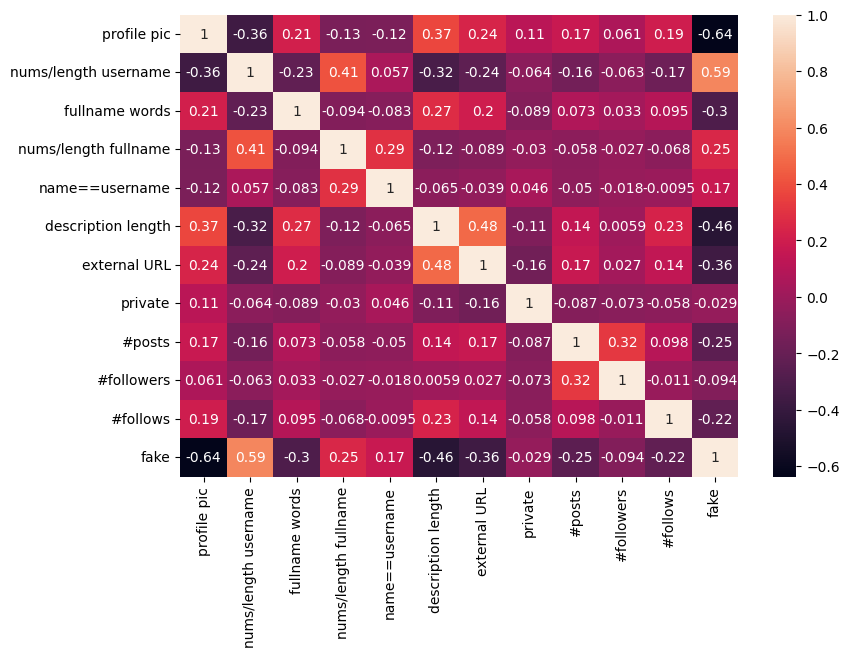

In [177]:
plt.figure(figsize=(9, 6))
sns.heatmap(train_data.corr(), annot=True)
plt.show()


In [178]:

fake_corr = train_data.corr()['fake'].sort_values(ascending=False)
print(fake_corr)


fake                    1.000000
nums/length username    0.587687
nums/length fullname    0.246782
name==username          0.170695
private                -0.028586
#followers             -0.093689
#follows               -0.224835
#posts                 -0.245355
fullname words         -0.298793
external URL           -0.362809
description length     -0.460825
profile pic            -0.637315
Name: fake, dtype: float64


In [179]:


# Calculate the correlation between "fake" and all other columns
fake_corr = train_data.corr()['fake'].sort_values(ascending=False)

fake_corr = fake_corr.abs().sort_values(ascending=False)

# Print the correlation in order from big to small
print(fake_corr)


fake                    1.000000
profile pic             0.637315
nums/length username    0.587687
description length      0.460825
external URL            0.362809
fullname words          0.298793
nums/length fullname    0.246782
#posts                  0.245355
#follows                0.224835
name==username          0.170695
#followers              0.093689
private                 0.028586
Name: fake, dtype: float64


In [180]:

train_data['follows/followers ratio'] = train_data['#follows'] / train_data['#followers']


In [181]:
train_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follows/followers ratio
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,0.955000
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,0.194526
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,0.616352
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,1.572464
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,0.834437


In [182]:


corr = train_data.corr()['fake']['follows/followers ratio']
print(f"Correlation between 'fake' and 'follows/followers ratio': {corr}")


Correlation between 'fake' and 'follows/followers ratio': 0.2457819908064409


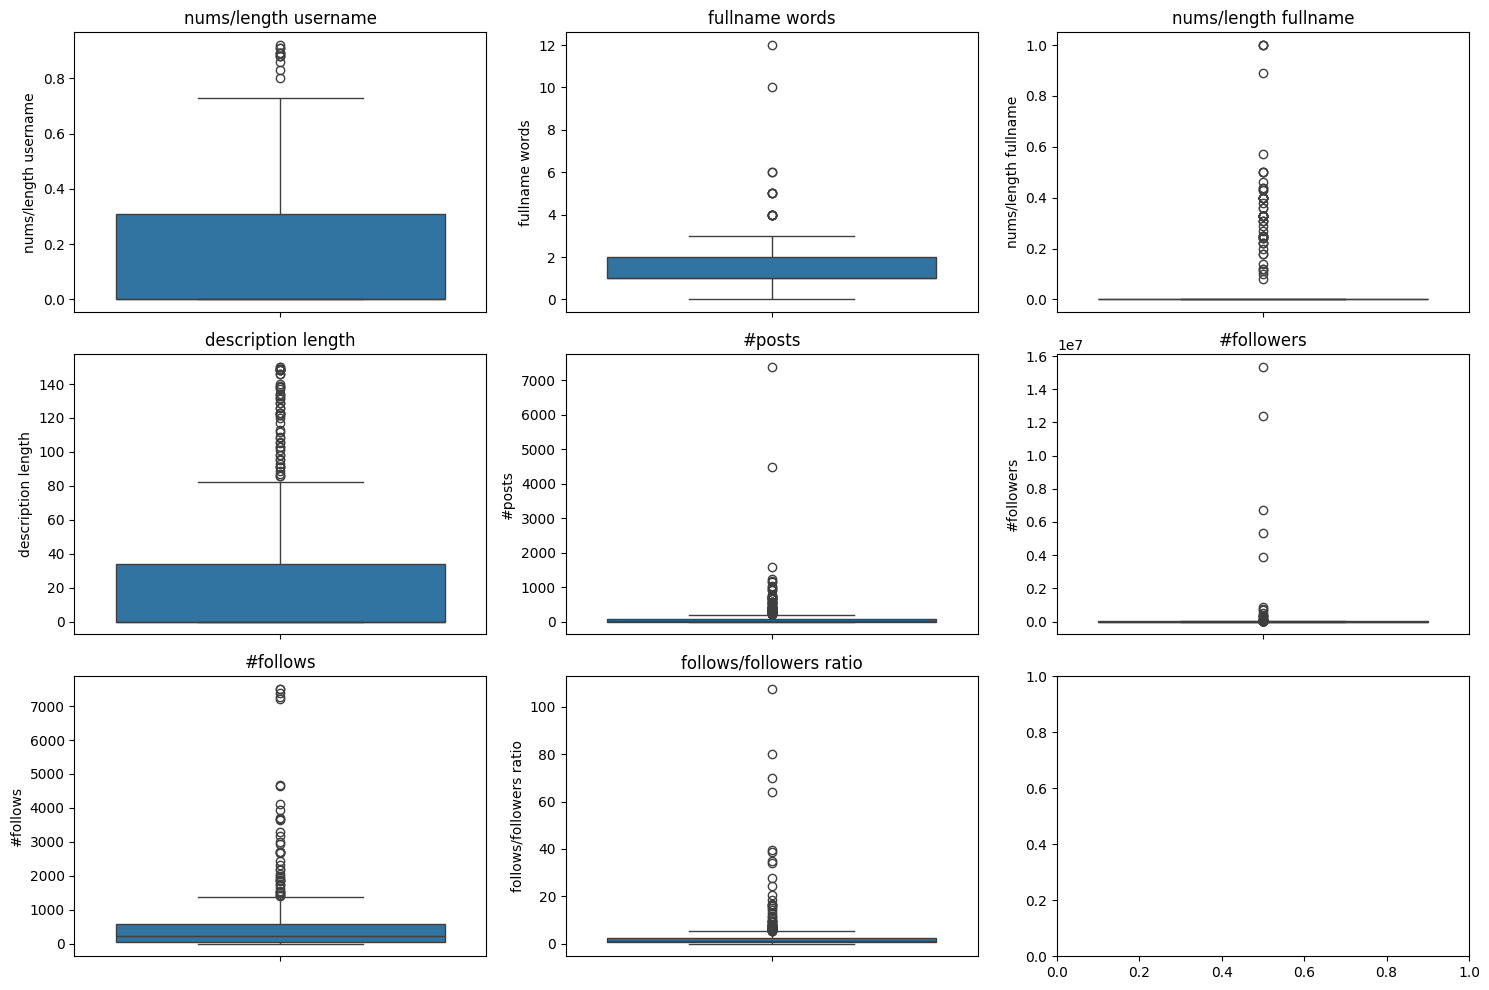

In [183]:


cols_to_plot = [col for col in train_data.columns if train_data[col].nunique() > 2]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, col in enumerate(cols_to_plot):
  ax = axes[i // 3, i % 3]
  sns.boxplot(y=train_data[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()


In [184]:

def check_outliers_zscore(df, col):
  z_scores = (df[col] - df[col].mean()) / df[col].std()

  threshold = 3

  outliers = df[abs(z_scores) > threshold]

  print(f"Number of outliers for '{col}': {outliers.shape[0]}")
  return outliers


for col in train_data.columns:
  outliers = check_outliers_zscore(train_data, col)

  if outliers.shape[0] > 0:
    train_data[col] = train_data[col].fillna(train_data[col].median())




Number of outliers for 'profile pic': 0
Number of outliers for 'nums/length username': 11
Number of outliers for 'fullname words': 8
Number of outliers for 'nums/length fullname': 13
Number of outliers for 'name==username': 20
Number of outliers for 'description length': 16
Number of outliers for 'external URL': 0
Number of outliers for 'private': 0
Number of outliers for '#posts': 3
Number of outliers for '#followers': 5
Number of outliers for '#follows': 13
Number of outliers for 'fake': 0
Number of outliers for 'follows/followers ratio': 0


In [185]:

is_null_sum = train_data.isnull().sum()
print(f"Number of null values in 'search': {is_null_sum}")


Number of null values in 'search': profile pic                0
nums/length username       0
fullname words             0
nums/length fullname       0
name==username             0
description length         0
external URL               0
private                    0
#posts                     0
#followers                 0
#follows                   0
fake                       0
follows/followers ratio    3
dtype: int64


In [186]:

train_data['follows/followers ratio'] = train_data['follows/followers ratio'].fillna(0)


In [187]:

is_null_sum = train_data.isnull().sum()
print(f"Number of null values in 'search': {is_null_sum}")



Number of null values in 'search': profile pic                0
nums/length username       0
fullname words             0
nums/length fullname       0
name==username             0
description length         0
external URL               0
private                    0
#posts                     0
#followers                 0
#follows                   0
fake                       0
follows/followers ratio    0
dtype: int64


In [188]:

X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop('fake', axis=1), train_data['fake'], test_size=0.2, random_state=42)


In [189]:

null_counts = {
    'train': X_train.isnull().sum().sum(),
    'validation': X_valid.isnull().sum().sum(),
    'test': test_data.isnull().sum().sum()
}

for dataset, null_count in null_counts.items():
    print(f"Number of null values in {dataset} set: {null_count}")


Number of null values in train set: 0
Number of null values in validation set: 0
Number of null values in test set: 0


In [190]:

inf_values = np.isinf(X_train).sum().sum() + np.isinf(X_valid).sum().sum()
large_values = np.isclose(np.abs(X_train), np.inf).sum().sum() + np.isclose(np.abs(X_valid), np.inf).sum().sum()

if inf_values > 0 or large_values > 0:
  X_train = np.where(np.isinf(X_train) | np.isclose(np.abs(X_train), np.inf), 1e6, X_train)
  X_valid = np.where(np.isinf(X_valid) | np.isclose(np.abs(X_valid), np.inf), 1e6, X_valid)



In [191]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

xgb_model = XGBClassifier(random_state=42)



In [192]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)




Best parameters for Random Forest: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [193]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 16],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBClassifier:", grid_search_xgb.best_params_)


Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.5}


In [194]:

best_model = grid_search_xgb.best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [195]:

y_pred = best_model.predict(X_valid)



In [196]:

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))


Accuracy: 0.9224137931034483

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.91      0.92      0.92        53

    accuracy                           0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116



In [197]:

def preprocess_test_data(test_data):
  """
  This function preprocesses the test data to match the format of the training data

  Arguments:
    test_data: DataFrame

  Returns:
    DataFrame containing the preprocessed test data
  """

  test_data['follows/followers ratio'] = test_data['#follows'] / test_data['#followers']

  for col in test_data.columns:
    test_data[col] = test_data[col].fillna(test_data[col].median())

  return pd.DataFrame(test_data)




In [198]:

test_data_preprocessed = preprocess_test_data(test_data)



In [199]:
test_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follows/followers ratio
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0,1.237705
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0,0.171429
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0,2.036585
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0,0.494896
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0,1.582222


In [200]:

y_pred_test = best_model.predict(test_data_preprocessed.drop(columns="fake"))

accuracy = accuracy_score(y_pred_test, test_data_preprocessed['fake'])


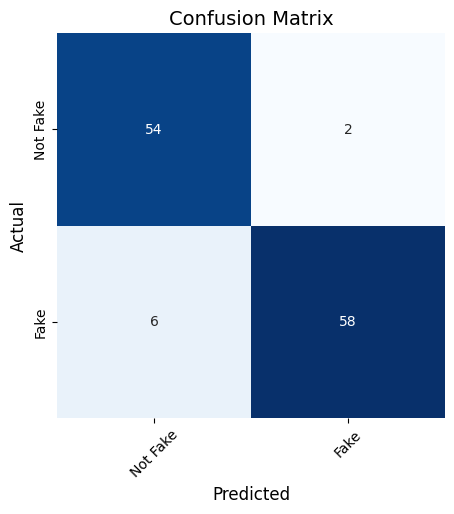

In [208]:


cm = confusion_matrix(y_pred_test, test_data_preprocessed['fake'])

labels = ['Not Fake', 'Fake']

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues", cbar=False)

ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Actual", fontsize=12)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_title("Confusion Matrix", fontsize=14)

plt.xticks(rotation=45)
plt.show()


In [209]:


f1 = f1_score(y_pred_test, test_data_preprocessed['fake'])

recall = recall_score(y_pred_test, test_data_preprocessed['fake'])

precision = precision_score(y_pred_test, test_data_preprocessed['fake'])

print(f"F1 Score: {f1}")
print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")

print(classification_report(y_pred_test, test_data_preprocessed['fake']))



F1 Score: 0.9354838709677419
Recall Score: 0.90625
Precision Score: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        56
           1       0.97      0.91      0.94        64

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



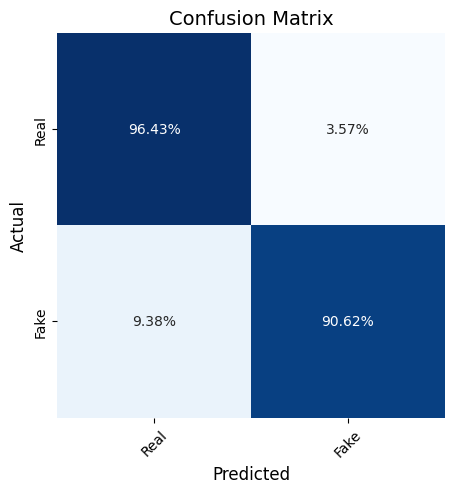

In [211]:


cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm_norm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt=".2%", ax=ax, cmap="Blues", cbar=False)

ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Actual", fontsize=12)
ax.set_xticklabels(['Real', 'Fake'], fontsize=10)
ax.set_yticklabels(['Real', 'Fake'], fontsize=10)
ax.set_title("Confusion Matrix", fontsize=14)

plt.xticks(rotation=45)

plt.show()
